## 👩‍💻 인과론
### ✔️ 이번 장 논의
이번 장에서는 자료가 만들어진 방식이 아니라 **자료를 만들어** 분석해 보자.    

'원인변수 T → 결과변수'의 관계에서, 정말로 T가 Y의 **원인**이 되는가?
#### ◽ 인과관계의 세 가지 요건
1. 원인이 시간적으로 결과에 선행되어야 한다.
2. 두 변수 사이에 **연관**이 존재해야 한다. (통계에서 볼 수 있는 것)
3. 제 3의 변수에 의해 설명되어서는 안 된다.

하지만 통계에서 보여주는 것은 오직 **연관**뿐이다. 그래서 특정한 통계적 모형을 사용해서 단순히 인과관계를 추정하면 무리가 있다. 이 때 중요한 것은 **제 3의 변수**에 의해 설명이 되지 않아야 한다는 점이다.   

예를 들어 T(빈곤) → Y(성적) 의 관계에서 제 3의 변수(교육)가 존재하며 이를 통제해 줄 필요가 있다.     
만약 빈곤이 랜덤하게 만들어졌다면 제 3의 변수가 T에 영향을 줄 수 없다. 그래서 실험이 과학에서 가장 좋은 방법이다. 실험은 **원인변수를 랜덤하게** 만들어 주기 때문이다. 그러나 사회과학은 관찰자료를 사용해서 인과적 추론을 하기 때문에, 이 문제에서 자유롭지 않다. 

### ✔️ 인과관계와 역인과관계

실제로 우리가 T ← Y 로 자료를 만들었다고 하자. 하지만 우리가 ```lm(Y ~ T)``` 로 T → Y 의 관계를 추정하면 어떻게 될까?     
회귀분석을 하면 계수의 값이 0이 되어야 한다. 그런데 실제 ```lm(Y ~ T)``` 명령어를 실행해 보면 계수가 0이 아니다.    
    
즉, 두 변수 사이에 **인과관계**가 있어서 회귀계수 값이 유의미할 수도 있지만, **역인과관계**가 있어서 회귀계수 값이 유의미하게 나올 수도 있음을 유의해야 한다. 이때, 역인과관계의 여부는 통계만으로는 알 수 없으며, 우리가 사회이론에 근거하여 파악해야 한다.  

실제 역인과관계가 있을 때, 역인과관계가 없는 것처럼 분석하면 어떤 결과가 나올까? 시뮬레이션을 해 보자.

In [3]:
set.seed(37846)
tvar <- rbinom(10000, 1, 0.5)
yvar <- 0.5 + tvar + rnorm(10000, 0, 1)

In [4]:
cbind(tvar, yvar)

length(tvar)

tvar,yvar
1,1.7226738
0,0.5031160
1,1.9966759
0,1.4310318
0,0.3790809
0,1.5417189
1,0.4092289
1,1.7542492
1,1.0068414
1,1.9561644


[1] 10000

각 행은 사례, 열은 변수를 나타낸다.    
- tvar : 한 번 시행했을 때 ```1```의 값을 가질 확률이 ```0.5```인 ```binomial distribution```에서 랜덤으로 ```10000```개의 사례를 만들어라. 
- yvar : 평균이 ```0```이고 표준편차가 ```1```인 ```normal distribution```에서 랜덤으로 ```10000```개의 사례를 만든 다음, 여기에 ```0.5+tvar```를 더하라. 

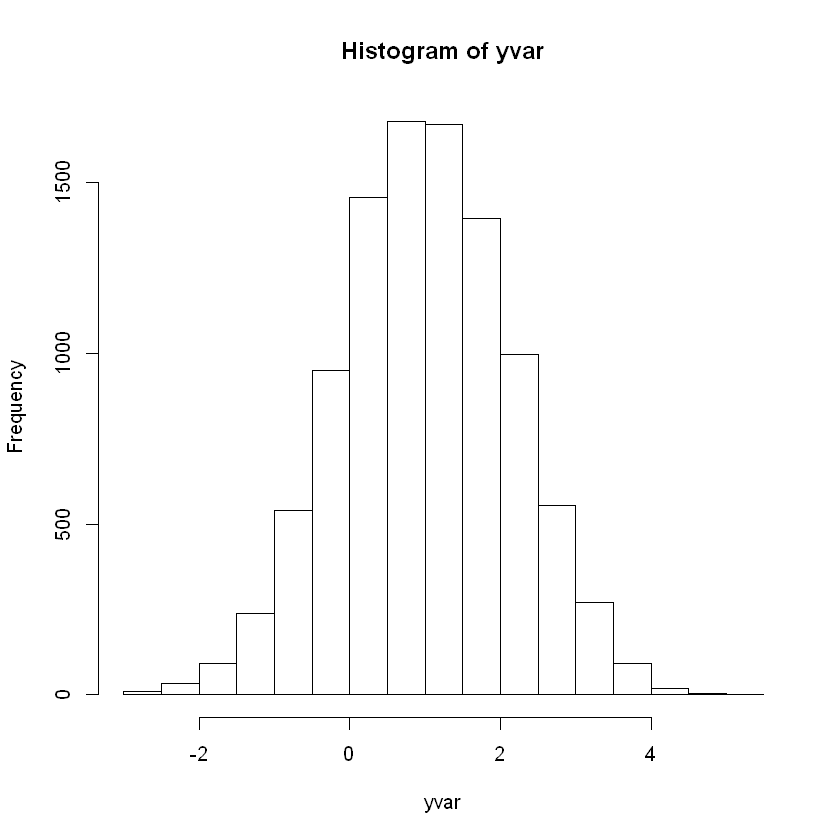

In [5]:
hist(yvar)

```hist(yvar)``` 명령어를 통해 ```yvar```의 분포를 보면 normal distribution임을 확인할 수 있다. 

요약하면 우리는 아무런 변수에도 영향 받지 않는 ```tvar```를 만든 다음, 
회귀분석의 모형에서 $${ \beta  }_{ 0 }$$ 이 0.5, ```tvar``` 앞에 붙은 계수가 1일 자료를 만든 것이다.

In [6]:
summary(cbind(tvar, yvar))

      tvar             yvar        
 Min.   :0.0000   Min.   :-2.9274  
 1st Qu.:0.0000   1st Qu.: 0.2304  
 Median :0.0000   Median : 1.0009  
 Mean   :0.4923   Mean   : 1.0041  
 3rd Qu.:1.0000   3rd Qu.: 1.7795  
 Max.   :1.0000   Max.   : 5.1569  

실제 ```tvar```의 평균은 0.4923으로 0.5와 약간 차이가 있긴 하지만 매우 비슷하다. 약간의 차이는 표집오차에 의한 것으로 이해하면 된다. 이때 tvar가 yvar에 미치는 영향을 알아보자.

In [7]:
summary(lm(yvar ~ tvar))


Call:
lm(formula = yvar ~ tvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1479 -0.6824 -0.0009  0.6941  3.6225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48986    0.01404   34.90   <2e-16 ***
tvar         1.04448    0.02001   52.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1 on 9998 degrees of freedom
Multiple R-squared:  0.2142,	Adjusted R-squared:  0.2141 
F-statistic:  2726 on 1 and 9998 DF,  p-value: < 2.2e-16


```Intercept```가 0.48986으로 0.5에 거의 가깝다. ```tvar```의 계수도 1에 가깝다. 즉, 우리가 예상한 대로 회귀분석 결과가 나왔다.   
하지만 이것은 우리가 ```tvar```와 ```yvar```의 관계를 미리 가정한 다음 자료를 만든 것이기 때문에 크게 놀랍지 않다.  
   
하지만 사회과학 자료에서는 이미 만들어진 자료를 분석해야 한다. 따라서 우리가 두 변수 사이의 관계를 분석하다 보면 거꾸로 생각하는 경우가 있을 수도 있고, **역인과관계가 있는데 역인과관계를 모르고 그냥 분석할 수도 있다**. 예를 들어

In [8]:
summary(lm(tvar ~ yvar))


Call:
lm(formula = tvar ~ yvar)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12669 -0.38985 -0.01059  0.39362  1.24964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.286374   0.005933   48.27   <2e-16 ***
yvar        0.205094   0.003928   52.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4432 on 9998 degrees of freedom
Multiple R-squared:  0.2142,	Adjusted R-squared:  0.2141 
F-statistic:  2726 on 1 and 9998 DF,  p-value: < 2.2e-16


원래 우리가 ```tvar```와 ```yvar```를 만들 때, ```tvar```는 ```yvar```에 의해 영향 받지 않는다.   
그래서 두 변수의 관계를 바꾸어 회귀분석을 하면 ```yvar```의 계수는 0이 나와야 한다. 그런데 회귀분석 결과 계수는 0이 아니며, 심지어 통계적으로 유의미하다. 즉, yvar에 의해 tvar가 변하는 것처럼 나온다.   

이렇게 역인과관계가 있을 때에는 계수가 0이 아니라 잘못된 값이 나온다. 통계 분석은 연관을 보여줄 뿐이지 인과를 보여주지 않기 때문이다. 즉, ```tvar```가 ```yvar```에 영향을 주는 관계로 자료를 만들었지만, 거꾸로 ```tvar```가 ```yvar```에 의해 영향받는 것처럼 분석했을 때, 결과가 **역인과관계**에 의해 편이된다. 역인과관계의 존재성은 우리의 **통찰 또는 사회과학적 이론**에 근거하여 찾는다. 
    
"역인과관계를 어떻게 해결할 수 있을까?"

In [9]:
set.seed(847508)
yvar <- rnorm(10000)
tvar <- rbinom(10000, 1, 1/(exp(-yvar)+1))

- yvar : normal distribution에서 10000개의 사례를 만든다. (따로 평균과 표준편차를 적지 않은 경우 표준정규분포를 의미한다.)
- tvar : 한 번 시행했을 때 1의 값을 가질 확률이 1/(exp(-yvar)+1)인 binomial distribution에서 10000개의 사례를 만든다.
   
```yvar```는 어떤 변수에도 영향을 받지 않으며 ```tvar```는 ```yvar```의 함수이다. 즉 우리가 만든 자료에서 ```yvar```가 원인변수, ```tvar```가 결과변수이다.

In [10]:
summary(lm(yvar ~ tvar))


Call:
lm(formula = yvar ~ tvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5881 -0.6192 -0.0095  0.6022  3.6785 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.39640    0.01297  -30.57   <2e-16 ***
tvar         0.81967    0.01832   44.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9162 on 9998 degrees of freedom
Multiple R-squared:  0.1668,	Adjusted R-squared:  0.1667 
F-statistic:  2001 on 1 and 9998 DF,  p-value: < 2.2e-16


반대로 원인변수를 ```tvar```, 결과변수를 ```yvar```으로 설정하여 분석한다면 ```tvar```의 계수는 0이어야 할 것이다. 우리가 자료를 만들 때 ```yvar```를 어떤 변수에도 영향받지 않는 변수로 만들었기 때문이다.    
   
하지만 실제 회귀분석 결과 ```tvar```의 계수는 0.81967로 매우 크며 심지어 통계적으로 유의미하기까지 한다. 따라서 이 분석은 완전히 잘못된 것이다. 즉, **원인변수와 종속변수가 바뀐 건 아닌지** 스스로 질문을 하는 습관이 필요하다. 관계를 추정할 때 역인과관계가 있을 수 있기 때문이다. 

### 🙋 ```tvar```에서 ```1/(exp(-yvar)+1)```의 의미는 무엇인가?

```tvar <- rbinom(10000, 1, 1/(exp(-yvar)+1))```에서 ```1/(exp(-yvar)+1)```의 의미를 알기 위해서는 로짓(logit) 혹은 로지스틱(logistic) 모형을 알고 있어야 한다.   
로짓 모형 : **종속 변수**가 **이항 변수**인 경우 **설명 변수**의 **영향력**을 추정하는 모형이다. 일종의 회귀모형이지만 최소제곱법이 아니라 **최대우도법(maximum liklihood)** 을 사용한다. 즉, 확률을 중심으로 이해해 보자.   
   
```T```가 0과 1로만 이루어진 **이항변수**라고 하자. 이때  E(T) = P(T=1)임은 자명하다. (즉, 확률 = 기댓값) 따라서 특정 이항 변수의 평균을 보면 그것의 확률을 알 수 있다.  
  
지금까지 배워왔던 회귀분석은 $$T={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y+\epsilon $$인데, 여기에 기댓값을 취해주면 잔차를 의미하는 epslion이 0이 되어 $$E(T)={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y$$으로 나타낼 수 있다.

이 상태에서 linear line을 그리면 확률이 0 밑으로 떨어지거나 1보다 높아지기도 한다. 하지만 확률의 정의상 그럴 수 없다. 따라서 **종속 변수**를 더 잘 설명할 수 있고, **확률의 개념에서 벗어나지 않는** 새로운 모형이 필요하다. 이때 사용하는 모형을 **logistic curve**라고 하는데, 0과 1에는 완전히 같지 않지만 점근하며 중간에 변곡점이 있는 형태의 곡선이다.

$$P(T=1)\le 1$$
odds : $$\frac { probability\quad of\quad success }{ probability\quad of\quad failure } =\frac { P(T=1) }{ 1-P(T=1) } $$ 이고, $$0\le \frac { P(T=1) }{ 1-P(T=1) } \le \infty $$   
   
확률이 0에 가까워질수록 odds도 0에 가까워진다. 반대로 확률이 1에 가까워질수록 odds가 양의 무한대에 가까워진다.   
따라서 odds는 0과 무한대 사이에 놓이게 된다. 
   
   
그런데 $$T={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y+\epsilon$$은 음수를 가질 수 있지만  
현재의 odds 값은 음수를 가질 수 없다는 한계가 있다. odds 값이 마이너스 값을 가질 수 있도록 하려면 **자연로그 ln**을 취하면 된다. 이렇게 하면 로그의 정의상 **-infinte와 infinte 사이**로 범위가 바뀐다. P(T=1)에 관해 나타낸 좌변에 ln을 씌운 것을 'log odds transformation'이라는 의미에서 logit이라고 한다.

요약하면 logit model은 $$\ln { \frac { P(T=1) }{ 1-P(T=1) } ={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y } $$으로 나타낼 수 있다. 이때 좌변과 우변 모두 나타낼 수 있는 범위가  -infinte, infinite이다. (우변과 달리 0, infinite 사이의 범위를 가지고 있는 좌변에 log transformation을 수행했다.)  
   
    
이제 P(T=1) = some function으로 바꿔보자.   
양변에 e^x를 곱해 준 다음, (1-P(T=1))도 곱해주자. 그다음 P가 있는 건 왼쪽, P가 없는 건 오른쪽으로 보내 식을 P(T=1)에 대해서 정리해 보자.

$$\ln { \frac { P(T=1) }{ 1-P(T=1) } ={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y } \\ \frac { P(T=1) }{ 1-P(T=1) } ={ e }^{ { \beta  }_{ 0 }+{ \beta  }_{ 1 }Y }\\ P(T=1)\quad =\frac { { e }^{ { \beta  }_{ 0 }+{ \beta  }_{ 1 }Y } }{ 1+{ e }^{ { \beta  }_{ 0 }+{ \beta  }_{ 1 }Y } } =\frac { 1 }{ { e }^{ { -\beta  }_{ 0 }-{ \beta  }_{ 1 }Y }+1 } $$

실제로 그런지 확인해 보자. 이를 위해 사용할 모형은 일반화된 선형 모형(**generalized** linear model, 줄여서 glm)이다.이때 linear하다는 것은 계수 또는 모수에 대해 linear하다는 것을 의미한다. 따라서 이차함수나 지수함수 모형 등은 linear하다고 할 수 없다.
   
방금 전까지 우리가 만든 등식을 정리해 보면
좌변 : f(E(T)   
우변 : 계수와 설명변수의 조합   
으로 나타낼 수 있다. 위의 사례에서 좌변은 logit으로 변환되었고, 따라서 우변은 generalize되어 변수들이 linear하게 들어가 있다.
   
   
이때 f(E(T))를 **link function**이라고 한다. logit 모형에서는 logit link이며, 일반 E(T)의 경우 identity link가 있다.    
즉, **결과변수를 어떻게 변환**시켜주느냐에 따라서 **logit link**와 **identity link**가 있다.


$E(T)={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y\\ T={ \beta  }_{ 0 }+{ \beta  }_{ 1 }Y+\epsilon \\ \epsilon \quad \~ \quad N(0,\quad { \sigma  }^{ 2 })$$
  
가정을 하면서 최소제곱법이 아니라 최대우도법으로 beta0과 beta1을 추정할 수 있다.(확률을 가지고 liklihood를 maximize한다는 점에서 최소제곱법과 다르다.)
결론적으로 최소제곱법으로 구한 beta0와 beta1의 계수와 최대우도법으로 구한 계수는 같다, 그러나 sigma에 대한 추정이 다르다.
마지막으로 epslion은 normal distribution으로 추정할 수 있겠다.

In [18]:
summary(glm(tvar ~ yvar, family = binomial(link = "logit")))


Call:
glm(formula = tvar ~ yvar, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0956  -1.0881   0.5827   1.0748   2.2848  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.67652    0.03124  -21.66   <2e-16 ***
yvar         0.47433    0.01556   30.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13861  on 9999  degrees of freedom
Residual deviance: 12783  on 9998  degrees of freedom
AIC: 12787

Number of Fisher Scoring iterations: 4


```glm```으로 일반화된 선형 모형을 그려보자. ```glm```의 기본 옵션은 종속변수의 분포가 가우시안 분포를 따른다는 것이다. (```family``` 옵션) 우릐의 경우 종속변수가 이항분포를 따르기 때문에 ```family = binomial```으로 설정해 준다. 마지막으로 link function이 logit이므로 ```link = "logit"``` 옵션을 넣어 실행하면 된다.  
   
실행 결과 ```intercept``` 계수가 거의 0이고, ```yvar``` 계수가 거의 1에 가깝다. (약간의 차이는 표집오차라고 생각하자.)
결국 우리가 만든 그대로 분석 결과를 얻을 수 있다.   

### ✔️ 혼동 변수
역인과관계를 고려하지 않고 데이터 결과 분석하면 통계 결과가 왜곡될 수 있음을 지금까지 알아보았다. 여기서는 제3의 변수에 의한 편이가 있을 때 이걸 통제하지 않으면 어떤 문제가 생기는지 알아보도록 하자.

In [12]:
set.seed(4365)
cvar <- rnorm(10000)
tvar <- rbinom(10000, 1, 1/(exp(-cvar)+1))
yvar <- 1 + cvar + rnorm(10000)

- cvar : 어떤 다른 변수의 영향을 받지 않고 표준정규분포에서 10000개의 사례를 만든다.
- tvar : 한 번 시행했을 때 1의 값을 가질 확률이 1/(exp(-yvar)+1)인 binomial distribution에서 10000개의 사례를 만든다.   
    
- tvar : ```cvar```에 의해서만 영향을 받음, ```yvar``` 영향 받지 않음
- yvar : ```cvar```에 의해서만 영향을 받음, ```tvar``` 영향 받지 않음   
    
tvar가 yvar에 미치는 영향은? : 회귀모형에서 ```cvar```를 통제한 상태에서 ```tvar```가 ```yvar```에 미치는 영향을 보자. ```tvar```의 계수는 거의 0에 가까울 것이다.


In [13]:
summary(lm(yvar ~ tvar + cvar))


Call:
lm(formula = yvar ~ tvar + cvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2456 -0.6701  0.0147  0.6598  3.9013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.96397    0.01464  65.848   <2e-16 ***
tvar         0.03723    0.02182   1.706    0.088 .  
cvar         1.00992    0.01092  92.473   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9904 on 9997 degrees of freedom
Multiple R-squared:  0.5132,	Adjusted R-squared:  0.5131 
F-statistic:  5269 on 2 and 9997 DF,  p-value: < 2.2e-16


실제로 ```tvar```에 있는 계수가 거의 0에 가깝고 (약간의 오차는 표집오차로 생각하자), ```cvar```에 있는 계수가 거의 1에 가깝다.
만약에 우리가 혼동변수를 통제하지 않는다면 어떻게 될까?

In [14]:
summary(lm(yvar ~ tvar))


Call:
lm(formula = yvar ~ tvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0877 -0.9049 -0.0172  0.8991  5.4808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54864    0.01898   28.91   <2e-16 ***
tvar         0.88299    0.02698   32.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.349 on 9998 degrees of freedom
Multiple R-squared:  0.09675,	Adjusted R-squared:  0.09666 
F-statistic:  1071 on 1 and 9998 DF,  p-value: < 2.2e-16


```tvar```의 계수가 거의 1에 가까울 정도로 매우 크다.  
```tvar```가 ```yvar```에 미치는 영향은 원래 0이지만 두 변수 모두에 영향을 주는 ```cvar``` 통제하지 않았기 때문에 계수값이 왜곡되는 것이다. 이때 ```cvar```같은 역할을 하는 변수를 **혼동 변수(confounding variable)**, 이때 나타나는 편이를 **omitted variable bias**이라고 한다.

### ✔️ 매개 변수

In [15]:
set.seed(178590)
tvar <- rbinom(10000, 1, 0.5)
cvar <- tvar + rnorm(10000)
yvar <- 1 + cvar + rnorm(10000)

- tvar : 원인변수, 아무런 변수에도 영향받지 않는다.
- cvar : ```tvar```에 의해 영향받는다.
- yvar : ```cvar```에 의해 영향받는다.  
  
결국 ```tvar```와 ```yvar``` 중간에 ```cvar```라고 하는 매개변수가 존재하는 상황이다.  
**매개변수를 통제하는 것은 과잉 통제를 야기하여 전체효과에 대한 추정에 편이를 가져온다.**
  
이런 **매개변수가 있을 때** ```tvar```가 ```yvar```에 **영향을 주는지** 알고 싶다.    
직접적인 영향을 주지는 않을 것 같지만, 간접적인 영향을 준다.

In [16]:
summary(lm(yvar ~ tvar))


Call:
lm(formula = yvar ~ tvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8822 -0.9535 -0.0047  0.9624  5.6881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.00769    0.02021   49.85   <2e-16 ***
tvar         0.95873    0.02839   33.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.419 on 9998 degrees of freedom
Multiple R-squared:  0.1024,	Adjusted R-squared:  0.1023 
F-statistic:  1141 on 1 and 9998 DF,  p-value: < 2.2e-16


단순히 직접적인 영향에 대해 생각하면 이렇다.

In [17]:
summary(lm(yvar ~ tvar + cvar))


Call:
lm(formula = yvar ~ tvar + cvar)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1118 -0.6863  0.0011  0.6775  4.1836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.014380   0.014219  71.341   <2e-16 ***
tvar        -0.016388   0.022177  -0.739     0.46    
cvar         0.994616   0.009844 101.042   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9982 on 9997 degrees of freedom
Multiple R-squared:  0.5559,	Adjusted R-squared:  0.5558 
F-statistic:  6257 on 2 and 9997 DF,  p-value: < 2.2e-16


하지만 ```cvar```를 통제한 다음 회귀모형을 돌리면 ```tvar```의 계수가 거의 0이 나온다. (```cvar```를 통제한 상태에서의 ```tvar```의 영향)
사실 ```tvar```는 **최소한 간접적으로** ```yvar```에 영향이 있지만, **매개변수를 통제하니 영향이 없는 것처럼 나온다**.


#### 🤔 사례 1 
혼동변수로서 보통 gender를 많이 사용한다. 예컨대 ```lm(임금 ~ 교육 + 성별)```의 형태로 자주 사용된다. 
사회과학적 지식으로, 전통 사회에서는 성별을 통제해야 교육의 효과를 알 수 있음을 알고 있다. 성별은 교육에 영향을 주고, 교육이 임금에 영향을 주는 관계이다.
그런데 ```성별``` 혼동변수를 통제해 버리면, 성별이 임금에 영향을 주지 않는 것처럼 나온다.   
   
#### 🤔 사례 2
```lm(주관적 행복 ~ 소득 + 교육)```의 경우 교육이 혼동변수로 들어간다. 그러나 사실 교육의 효과를 보려면 교육에 걸맞는 다른 혼동변수를 보야 한다.     
예컨대 ```lm(주관적 행복 ~ 교육 + 부모 교육 + 부모 사회경제적 지위)```처럼 분석해야 할 필요가 있다.     
위의 사례처럼 소득을 통제해서는 안 되는데, 이는 (교육 → 소득 → 주관적 행복)의 관계에서 매개변수를 통제해버리는 것이기 때문이다.


### ✔️ 정리 및 소결

유의점
- 역인과관계를 사용하지 않았는가?
- 제3의 변수에 의해 혼동관계가 있는데 통제하지 않았는가?
- 통제하지 말아야 할 게 있는데 과잉 통제했는가?
아쉽게도 이런 것들은 통계로는 알 수 없으며, 우리의 사회과학적 지식으로 판단해야 한다.